In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib.patches import Patch
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

In [2]:
data = pd.read_excel("TOTAL_DATA_FINAL.xlsx", index_col="Squad").drop(columns = ['xGD', 'KP'])

data = data.loc[ (data.league == 'serie_a') | (data.league == 'la_liga') | (data.league == 'premier')].drop(columns = ['league'])

cutoff = len(data) - 60

football_train = data[:cutoff]
football_test = data[cutoff:]

In [3]:

label_types = np.select([data["Rk"].values <= 4,
                          (data["Rk"].values > 4) & (data["Rk"].values <= 15),
                          (data["Rk"].values > 15)], [1,2,3])


X_train = football_train[[i for i in football_test.columns if i != "Rk" and i != 'league']]
Y_train = label_types[:cutoff]

X_test = football_test[[i for i in football_test.columns if i != "Rk" and i != 'league']]
Y_test = label_types[cutoff:]


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7333333333333333

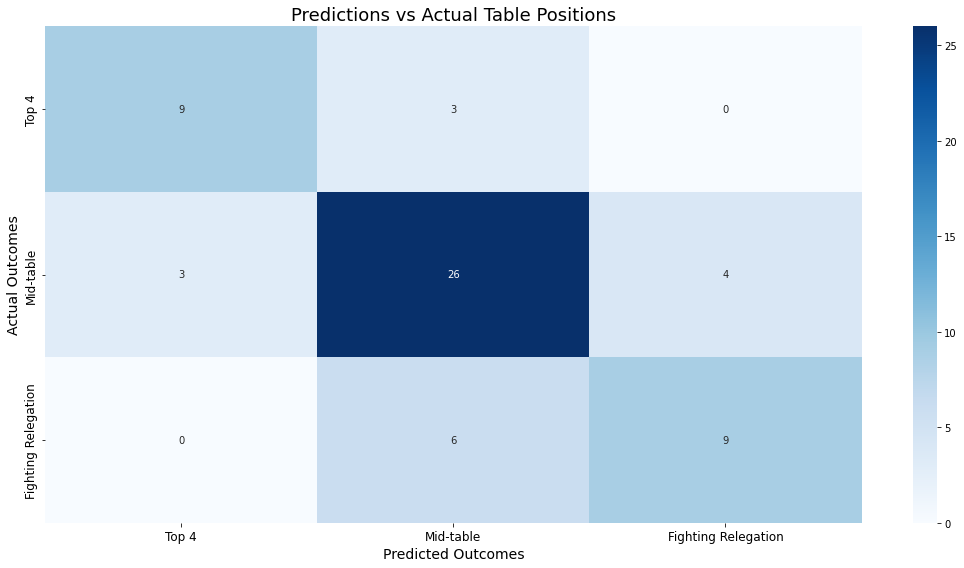

In [6]:


clf = MLPClassifier(solver='sgd', hidden_layer_sizes=(80, 100, 30, 70), alpha=1e-5, random_state=0, shuffle = False, max_iter=1000).fit(X_train, Y_train)

preds = clf.predict(X_test)

confusion = confusion_matrix(Y_test, preds)

plt.figure(figsize=(15,8))
fig = sns.heatmap(confusion, annot=True, cmap='Blues')
fig.set_xticklabels(['Top 4', 'Mid-table', 'Fighting Relegation'], size = 12)
fig.set_yticklabels(['Top 4', 'Mid-table', 'Fighting Relegation'], size = 12)
fig.set_title("Predictions vs Actual Table Positions", size = 18)
fig.set_xlabel("Predicted Outcomes", size = 14)
fig.set_ylabel("Actual Outcomes", size = 14)
plt.tight_layout()

accuracy_score(Y_test, preds)